## Deteksi Warna Pada Citra

In [362]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [363]:
img = cv2.imread('nama .jpg')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [364]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [365]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [366]:
lower_blue = np.array([100, 100, 50])
upper_blue = np.array([140, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
result_blue = cv2.bitwise_and(img, img, mask=mask_blue)


In [367]:
lower_red1 = np.array([0, 100, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 50])
upper_red2 = np.array([180, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)
mask_red = cv2.bitwise_or(mask_red1, mask_red2)
result_red = cv2.bitwise_and(img, img, mask=mask_red)

In [368]:
lower_green = np.array([40, 100, 50])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
result_green = cv2.bitwise_and(img, img, mask=mask_green)

In [369]:
blue_rgb = cv2.cvtColor(result_blue, cv2.COLOR_BGR2RGB)
red_rgb = cv2.cvtColor(result_red, cv2.COLOR_BGR2RGB)
green_rgb = cv2.cvtColor(result_green, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'HIJAU')

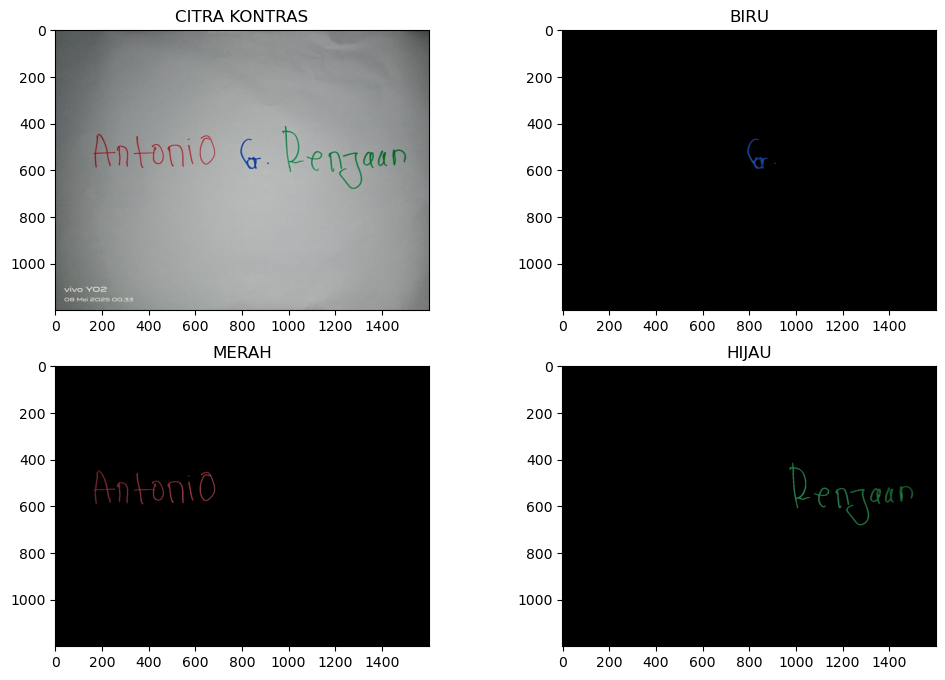

In [370]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].imshow(img_rgb); axs[0, 0].set_title('CITRA KONTRAS')
axs[0, 1].imshow(blue_rgb); axs[0, 1].set_title('BIRU')
axs[1, 0].imshow(red_rgb); axs[1, 0].set_title('MERAH')
axs[1, 1].imshow(green_rgb); axs[1, 1].set_title('HIJAU')


In [371]:
for ax in axs.flat:
    ax.axis('off')

In [372]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

## Mencari Dan Mengurutkan Ambang Batas Terkecil Sampai Dengan Terbesar

In [373]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [374]:
img_path = 'nama .jpg'  
img = cv2.imread(img_path)

Threshold Merah  : 141.0
Threshold Hijau  : 145.0
Threshold Biru   : 143.0


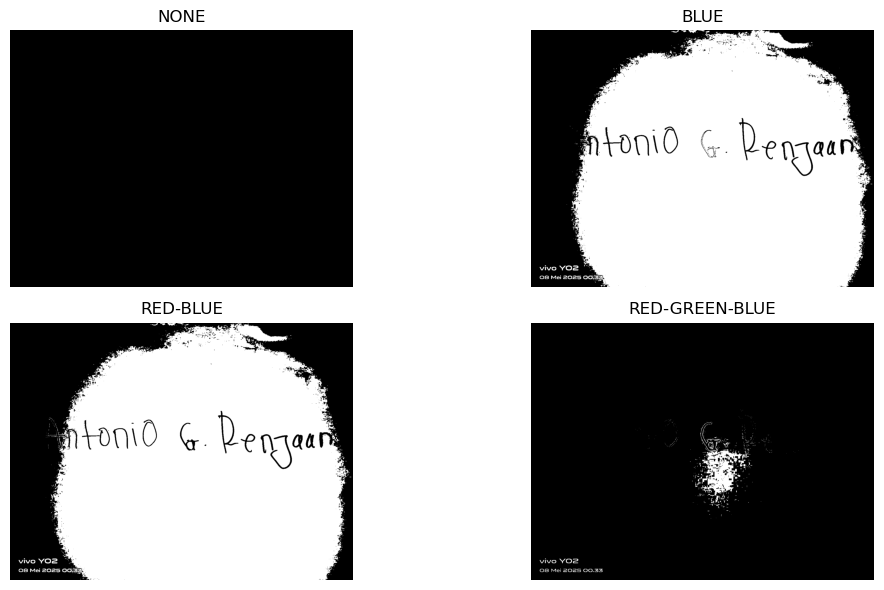

In [375]:
if img is None:
    print("Gambar tidak ditemukan. Periksa kembali path file.")
else:
    # 2. Konversi BGR ke RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 3. Pisahkan channel RGB
    r, g, b = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

    # 4. Hitung threshold Otsu dari masing-masing channel
    r_thresh_val, _ = cv2.threshold(r, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    g_thresh_val, _ = cv2.threshold(g, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    b_thresh_val, _ = cv2.threshold(b, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    print("Threshold Merah  :", r_thresh_val)
    print("Threshold Hijau  :", g_thresh_val)
    print("Threshold Biru   :", b_thresh_val)

    # 5. NONE (kosong, semua hitam)
    none_mask = np.zeros_like(r)

    # 6. BLUE saja
    _, blue_mask = cv2.threshold(b, b_thresh_val, 255, cv2.THRESH_BINARY)

    # 7. RED-BLUE gabungan
    rb = cv2.addWeighted(r.astype(np.uint8), 0.5, b.astype(np.uint8), 0.5, 0)
    _, rb_mask = cv2.threshold(rb, (r_thresh_val + b_thresh_val) / 2, 255, cv2.THRESH_BINARY)

    # 8. RED-GREEN-BLUE gabungan
    rgb = cv2.addWeighted(r.astype(np.uint8), 1/3, g.astype(np.uint8), 1/3, 0)
    rgb = cv2.addWeighted(rgb, 2/3, b.astype(np.uint8), 1/3, 0)
    _, rgb_mask = cv2.threshold(rgb, (r_thresh_val + g_thresh_val + b_thresh_val) / 3, 255, cv2.THRESH_BINARY)

    # 9. Tampilkan keempat gambar
    fig, axs = plt.subplots(2, 2, figsize=(12, 6))

    axs[0, 0].imshow(none_mask, cmap='gray')
    axs[0, 0].set_title("NONE")

    axs[0, 1].imshow(blue_mask, cmap='gray')
    axs[0, 1].set_title("BLUE")

    axs[1, 0].imshow(rb_mask, cmap='gray')
    axs[1, 0].set_title("RED-BLUE")

    axs[1, 1].imshow(rgb_mask, cmap='gray')
    axs[1, 1].set_title("RED-GREEN-BLUE")

    for ax in axs.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

## Memperbaiki Gambar Backlight

In [376]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [377]:
img = cv2.imread("gerald.jpg")  
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [378]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [379]:
bright = cv2.convertScaleAbs(gray, alpha=1, beta=50)

In [380]:
contrast = cv2.equalizeHist(gray)

In [381]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
bright_contrast = clahe.apply(bright)

(-0.5, 1279.5, 959.5, -0.5)

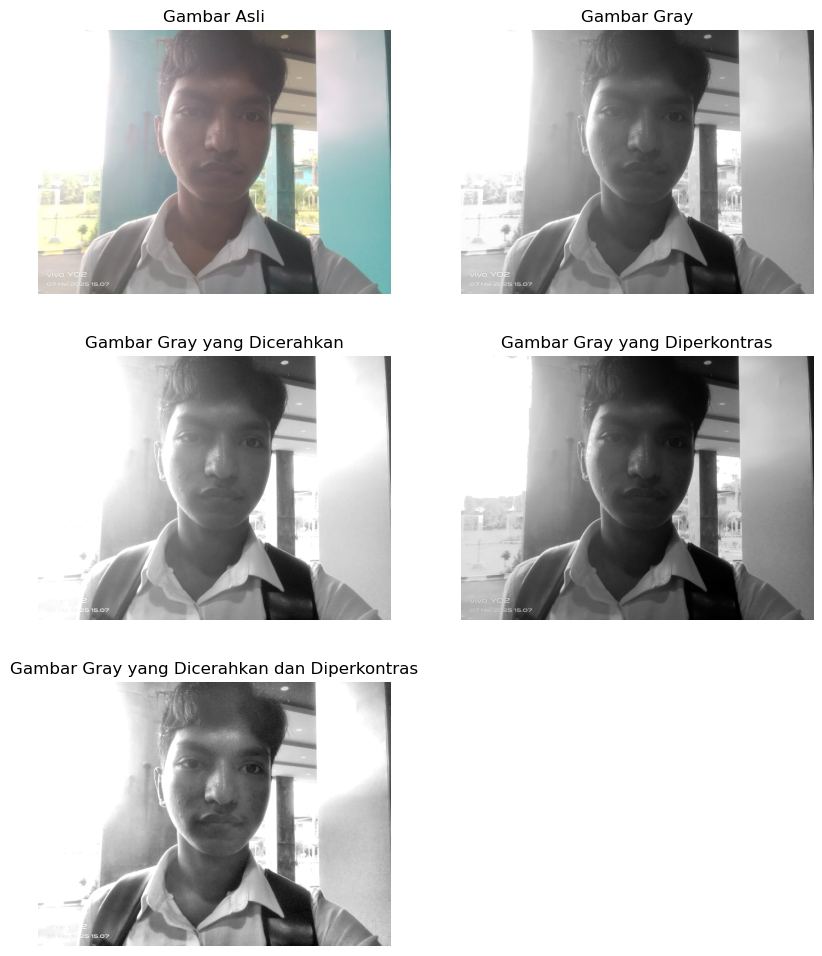

In [382]:
plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Gambar Gray")
plt.axis("off")

plt.subplot(3, 2, 3)
plt.imshow(bright, cmap='gray')
plt.title("Gambar Gray yang Dicerahkan")
plt.axis("off")

plt.subplot(3, 2, 4)
plt.imshow(contrast, cmap='gray')
plt.title("Gambar Gray yang Diperkontras")
plt.axis("off")

plt.subplot(3, 2, 5)
plt.imshow(bright_contrast, cmap='gray')
plt.title("Gambar Gray yang Dicerahkan dan Diperkontras")
plt.axis("off")

In [383]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>